In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import os
import seaborn as sb
from termcolor import colored as cl
!pip install kaleido
import kaleido
import plotly.express as px

'''
for dirname, x, filenames in os.walk('/data'):
  for filename in filenames:
    print(os.path.join(dirname, filename))
'''

data = pd.read_csv(r'Country-data.csv')
data_1 = data.copy()
data.info()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [55]:
df = data.copy()
df.drop(df.columns[[0]], axis=1, inplace=True)
print (df)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89 

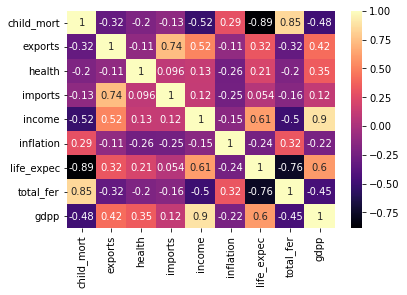

In [56]:
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [57]:
color=0
for col in df.columns:
  figure = px.choropleth(data, locationmode = 'country names', locations = 'country', title = col + ' Data', color = col, color_continuous_scale = "Reds")
  figure.update_layout(coloraxis_colorbar = {'title':col,})
  figure.update_geos(fitbounds="locations", visible=True)
  figure.write_image(f'{col}.png')
  figure.show(engine='kaleido')

In [58]:
df = Normalizer().fit_transform(df.values)
def KMeans_clustering(n_clusters, df):
  kmeans = KMeans(n_clusters = n_clusters, init='k-means++').fit(df)
  labels = kmeans.fit_predict(df)
  silhouette = metrics.silhouette_score(df, labels, metric='euclidean')
  print (n_clusters, silhouette)

array([[3.58656172e+01, 6.33203125e+00, 4.59216086e+01, 8.56924219e+03,
        8.95764844e+00, 6.78734375e+01, 3.26335938e+00, 4.43839063e+03],
       [9.64428571e+01, 5.71285714e+00, 6.85714286e+01, 8.03428571e+04,
        6.38871429e+00, 8.02857143e+01, 1.76714286e+00, 6.54428571e+04],
       [4.99781250e+01, 8.99156250e+00, 4.60218750e+01, 3.76218750e+04,
        3.38331250e+00, 7.91562500e+01, 1.94468750e+00, 3.55875000e+04]])

In [59]:
for i in range(3,10):
  KMeans_clustering(i, df)

3 0.5198837827909313
4 0.4634990957986046
5 0.43859967605023265
6 0.4721803077376323
7 0.4684770601551973
8 0.4301588482773124
9 0.43439763532888814


Silhouette Score: 0.5198837827909313
Labels: [0 0 0 2 2 2 0 1 1 0 1 2 0 1 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 1 2 0 0 2 0 2 2
 2 2 2 0 2 1 2 1 2 2 0 0 2 0 2 2 1 1 2 0 0 1 0 1 2 0 2 0 2 0 2 1 0 0 0 0 1
 1 1 2 1 0 0 0 1 2 0 0 2 2 0 0 0 2 1 0 0 0 0 2 0 2 0 2 1 0 0 0 0 0 0 2 0 1
 1 0 0 1 0 0 2 0 2 0 2 1 2 0 0 0 2 0 0 0 2 0 2 2 1 2 2 2 1 0 2 0 2 1 1 0 0
 0 1 0 2 0 2 0 0 0 2 1 1 2 0 1 1 0 0 0]
Cluster centers: [[2.65698003e-02 7.83591318e-03 2.09647839e-03 1.38388435e-02
  9.28546308e-01 2.75256412e-03 1.91114548e-02 1.44277188e-03
  3.62757939e-01]
 [1.89973424e-03 1.41159823e-03 5.18643396e-04 2.90914866e-03
  6.78742436e-01 3.45565877e-04 3.63893463e-03 1.78818699e-04
  7.29344202e-01]
 [8.42918330e-03 5.13419276e-03 8.04677579e-04 6.63167707e-03
  8.58474169e-01 1.28772230e-03 8.40689071e-03 5.51309664e-04
  5.08823371e-01]]


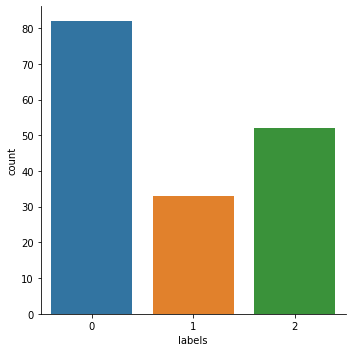

In [60]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=0).fit(df)
labels = kmeans.fit_predict(df)
sil_score = metrics.silhouette_score(df, labels, metric='euclidean')
print ("Silhouette Score: " + str(sil_score))
print ("Labels: " + str(labels))
centroids = kmeans.cluster_centers_
print ("Cluster centers: " + str(centroids))
data['labels'] = labels
sb.catplot(x='labels', kind='count', data=data)

In [61]:
max = len(centroids[0])
for i in range(max):
    print(data.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

country 
0.0001
child_mort 
0.0000
exports 
0.0000
health 
0.0000
imports 
0.0111
income 
0.0000
inflation 
0.0000
life_expec 
0.0000
total_fer 
0.0227


In [62]:
data = data.sort_values('labels')
data[data['labels']==0]
data[data['labels']==1]
data[data['labels']==2]

country  child_mort  exports  health  imports  \
141  St. Vincent and the Grenadines        20.7     26.9    4.47     57.1   
76                          Jamaica        18.1     31.3    4.81     49.6   
138                     South Korea         4.1     49.4    6.93     46.2   
11                          Bahrain         8.6     69.5    4.97     50.9   
143                        Suriname        24.1     52.5    7.01     38.4   
49                Equatorial Guinea       111.0     85.8    4.48     58.9   
33                            Chile         8.7     37.7    7.96     31.3   
51                          Estonia         4.5     75.1    6.03     68.7   
137                    South Africa        53.7     28.6    8.94     27.4   
151                           Tonga        17.4     12.4    5.07     60.3   
52                             Fiji        24.1     57.8    4.86     63.9   
153                          Turkey        19.1     20.4    6.74     25.5   
5                         Argentina        14.5     18.9    8.10     16.0   
4               Antigua and Barbuda        10.3     45.5    6.03     58.9   
3                            Angola       119.0     62.3    2.85     42.9   
157            United Arab Emirates         8.6     77.7    3.66     63.6   
63                           Guinea       109.0     30.3    4.93     43.2   
160                         Uruguay        10.6     26.3    8.35     25.4   
61                          Grenada        14.6     23.8    5.86     49.2   
67                          Hungary         6.0     81.8    7.33     76.5   
65                           Guyana        37.6     51.4    5.38     79.1   
134                 Slovak Republic         7.0     76.3    8.79     77.8   
100                       Mauritius        15.0     51.2    6.00     62.2   
98                            Malta         6.8    153.0    8.65    154.0   
30                       Cape Verde        26.5     32.7    4.09     61.8   
96                         Maldives        13.2     77.6    6.33     65.4   
28                         Cameroon       108.0     22.2    5.13     27.0   
35                         Colombia        18.6     15.9    7.59     17.8   
108                         Namibia        56.0     47.8    6.78     60.7   
36                          Comoros        88.2     16.5    4.51     51.7   
37                 Congo, Dem. Rep.       116.0     41.1    7.91     49.6   
38                      Congo, Rep.        63.9     85.1    2.46     54.7   
90                        Lithuania         6.1     65.3    7.04     67.2   
39                       Costa Rica        10.2     33.2   10.90     35.0   
41                          Croatia         5.5     37.6    7.76     38.1   
22                           Brazil        19.8     10.7    9.01     11.8   
117                          Panama        19.7     70.0    8.10     78.2   
86                          Lebanon        10.3     35.8    7.03     60.2   
119                            Peru        20.3     27.8    5.08     23.8   
85                           Latvia         7.8     53.7    6.68     55.1   
121                          Poland         6.0     40.1    7.46     42.1   
123                           Qatar         9.0     62.3    1.81     23.8   
43                   Czech Republic         3.4     66.0    7.88     62.9   
82                           Kuwait        10.8     66.7    2.63     30.4   
127                           Samoa        18.9     29.2    6.47     53.1   
16                           Belize        18.8     58.2    5.20     57.5   
45               Dominican Republic        34.4     22.7    6.22     33.3   
131                      Seychelles        14.4     93.8    3.40    108.0   
46                          Ecuador        25.1     27.9    8.06     32.4   
133                       Singapore         2.8    200.0    3.96    174.0   
136                 Solomon Islands        28.1     49.3    8.55     81.2   
55                      

In [63]:
figure = px.choropleth(data, locationmode='country names',locations='country',color='labels',title='Coutries by Cluster labels')
figure.show()

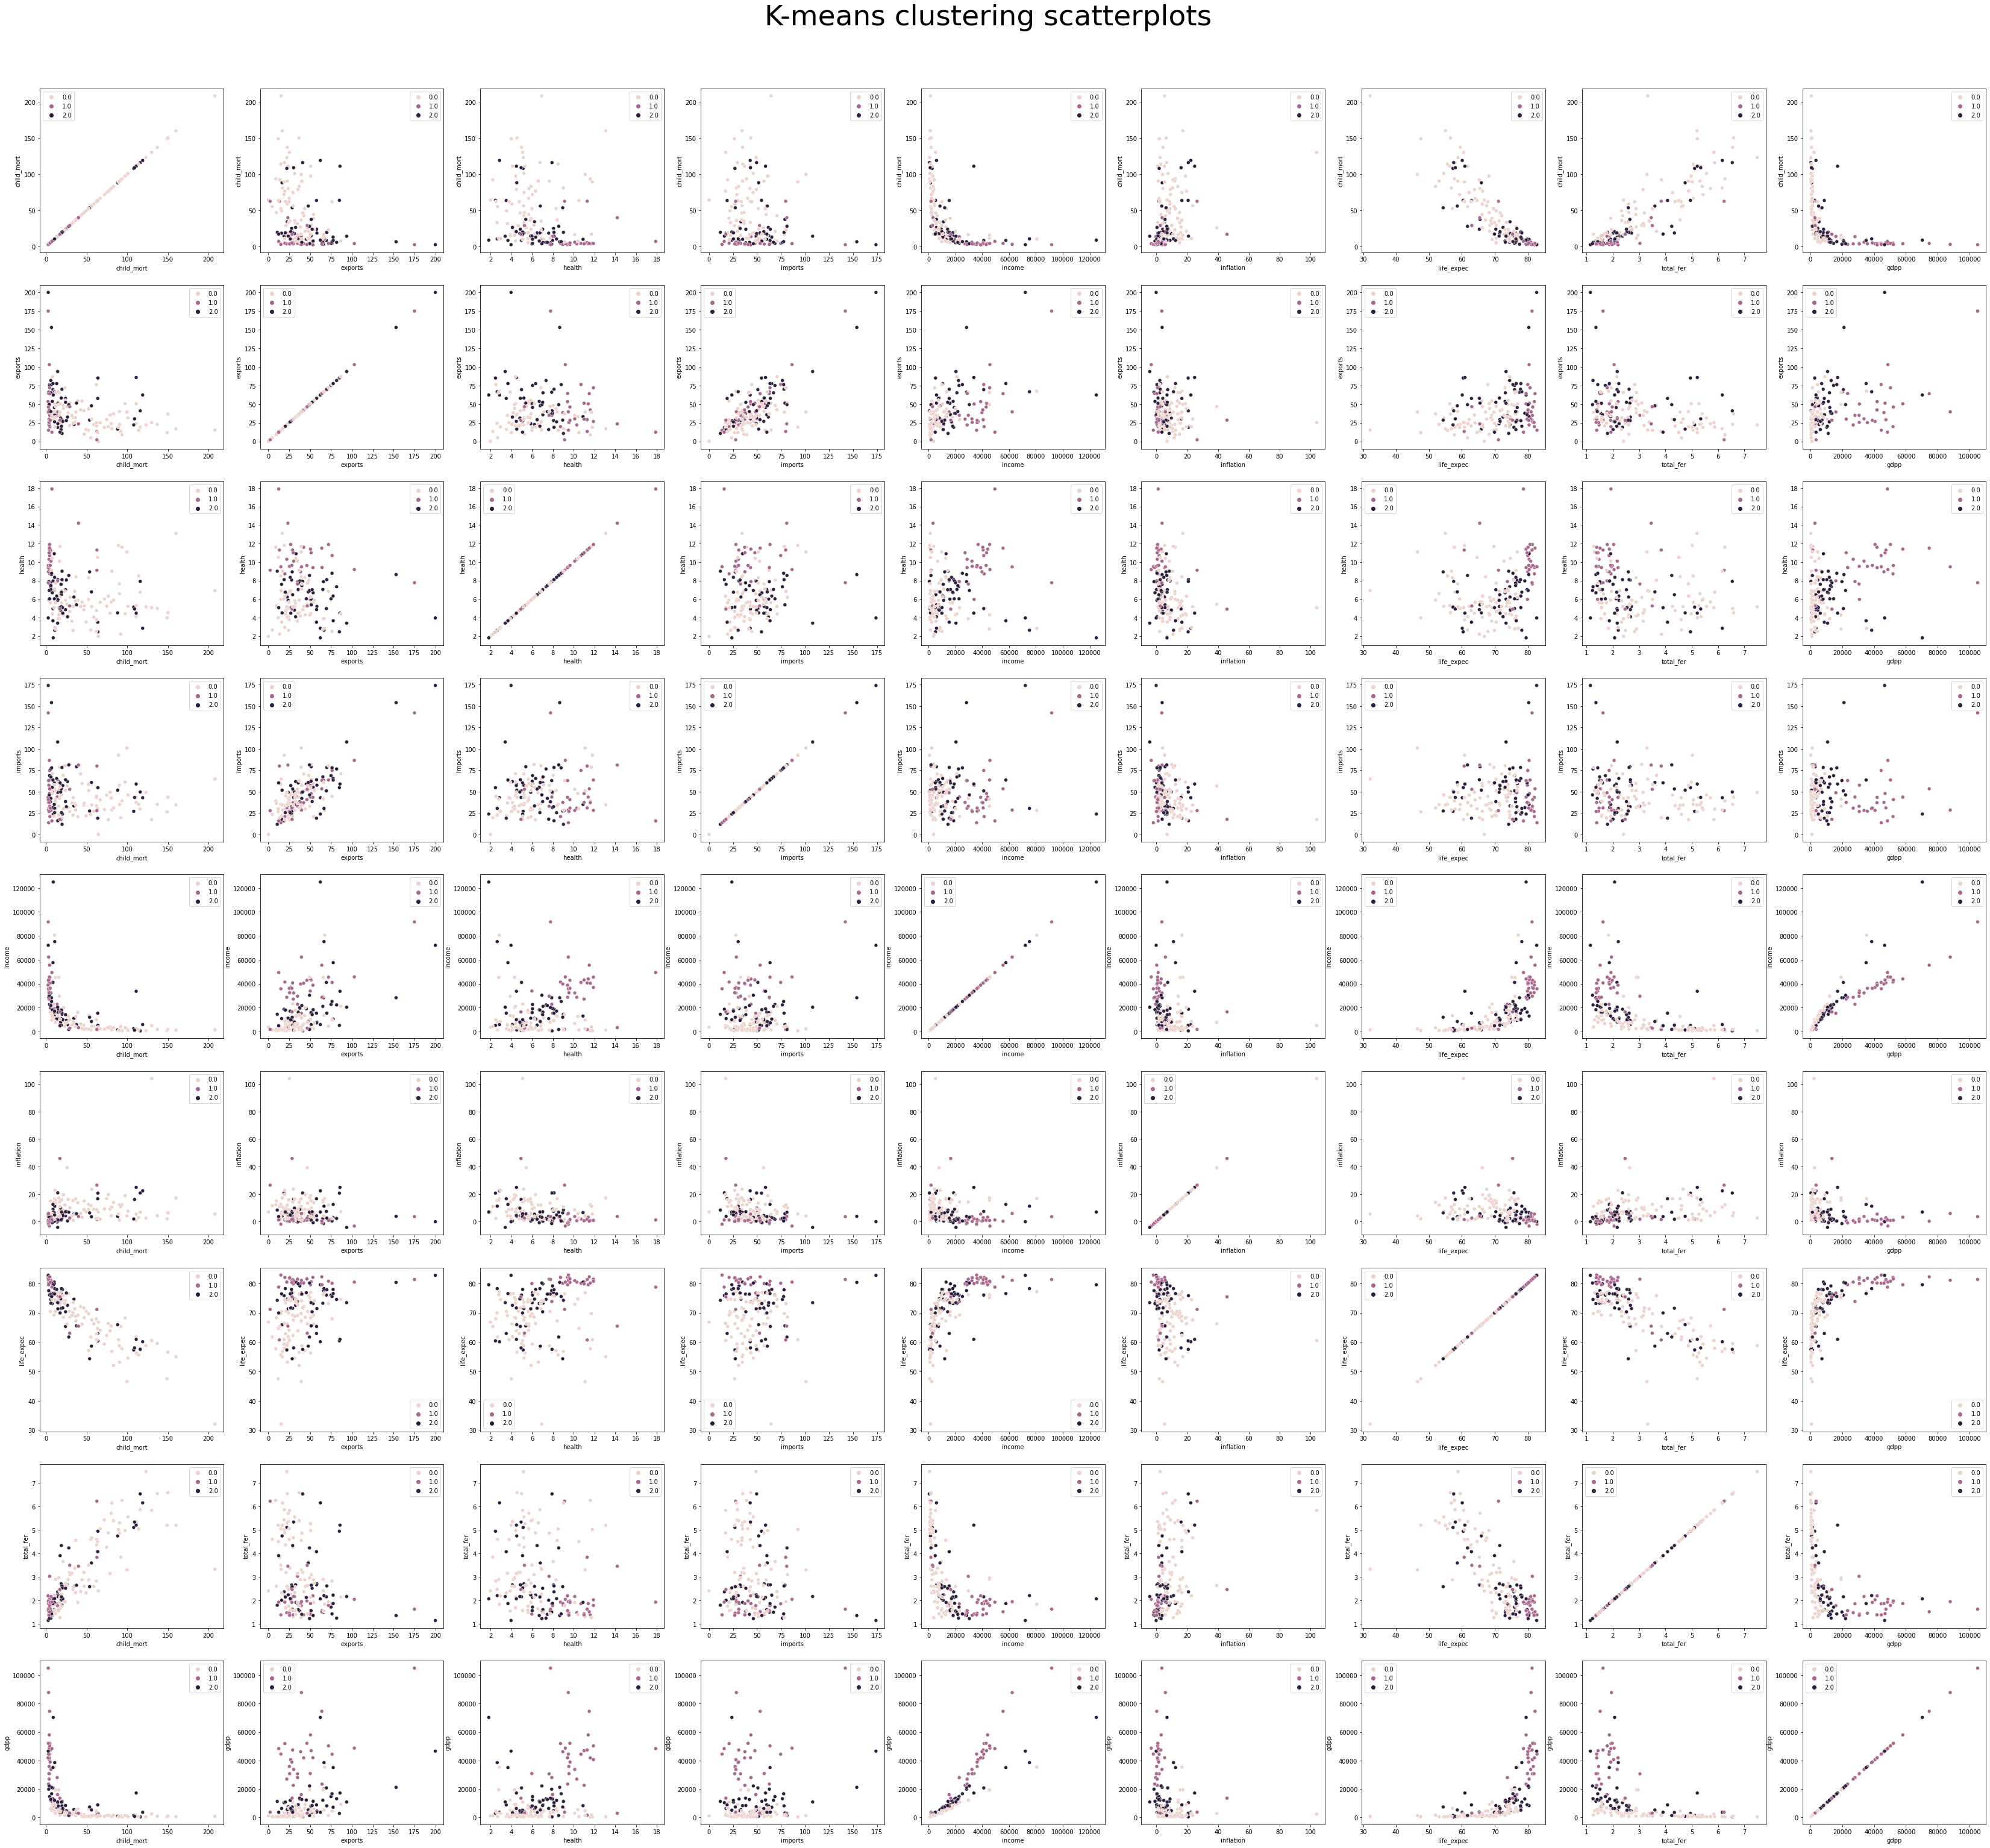

In [64]:
plt.figure(figsize = (71, 65))
plt.suptitle('K-means clustering scatterplots',fontsize=47,y=0.91,x=0.433)
for j in range(len(data.iloc[1:].columns)-2):
    for i in range(len(data.iloc[1:].columns)-2):
        plt.subplot(len(data.iloc[1:].columns),len(data.iloc[1:].columns),i+1+j*len(data.iloc[1:].columns))
        plot=sb.scatterplot(x = data.iloc[:,i+1], y = data.iloc[:,j+1], data = data[1:], hue = 'labels')
        plot.legend(fontsize=10)
plt.show()

<Figure size 432x288 with 0 Axes>

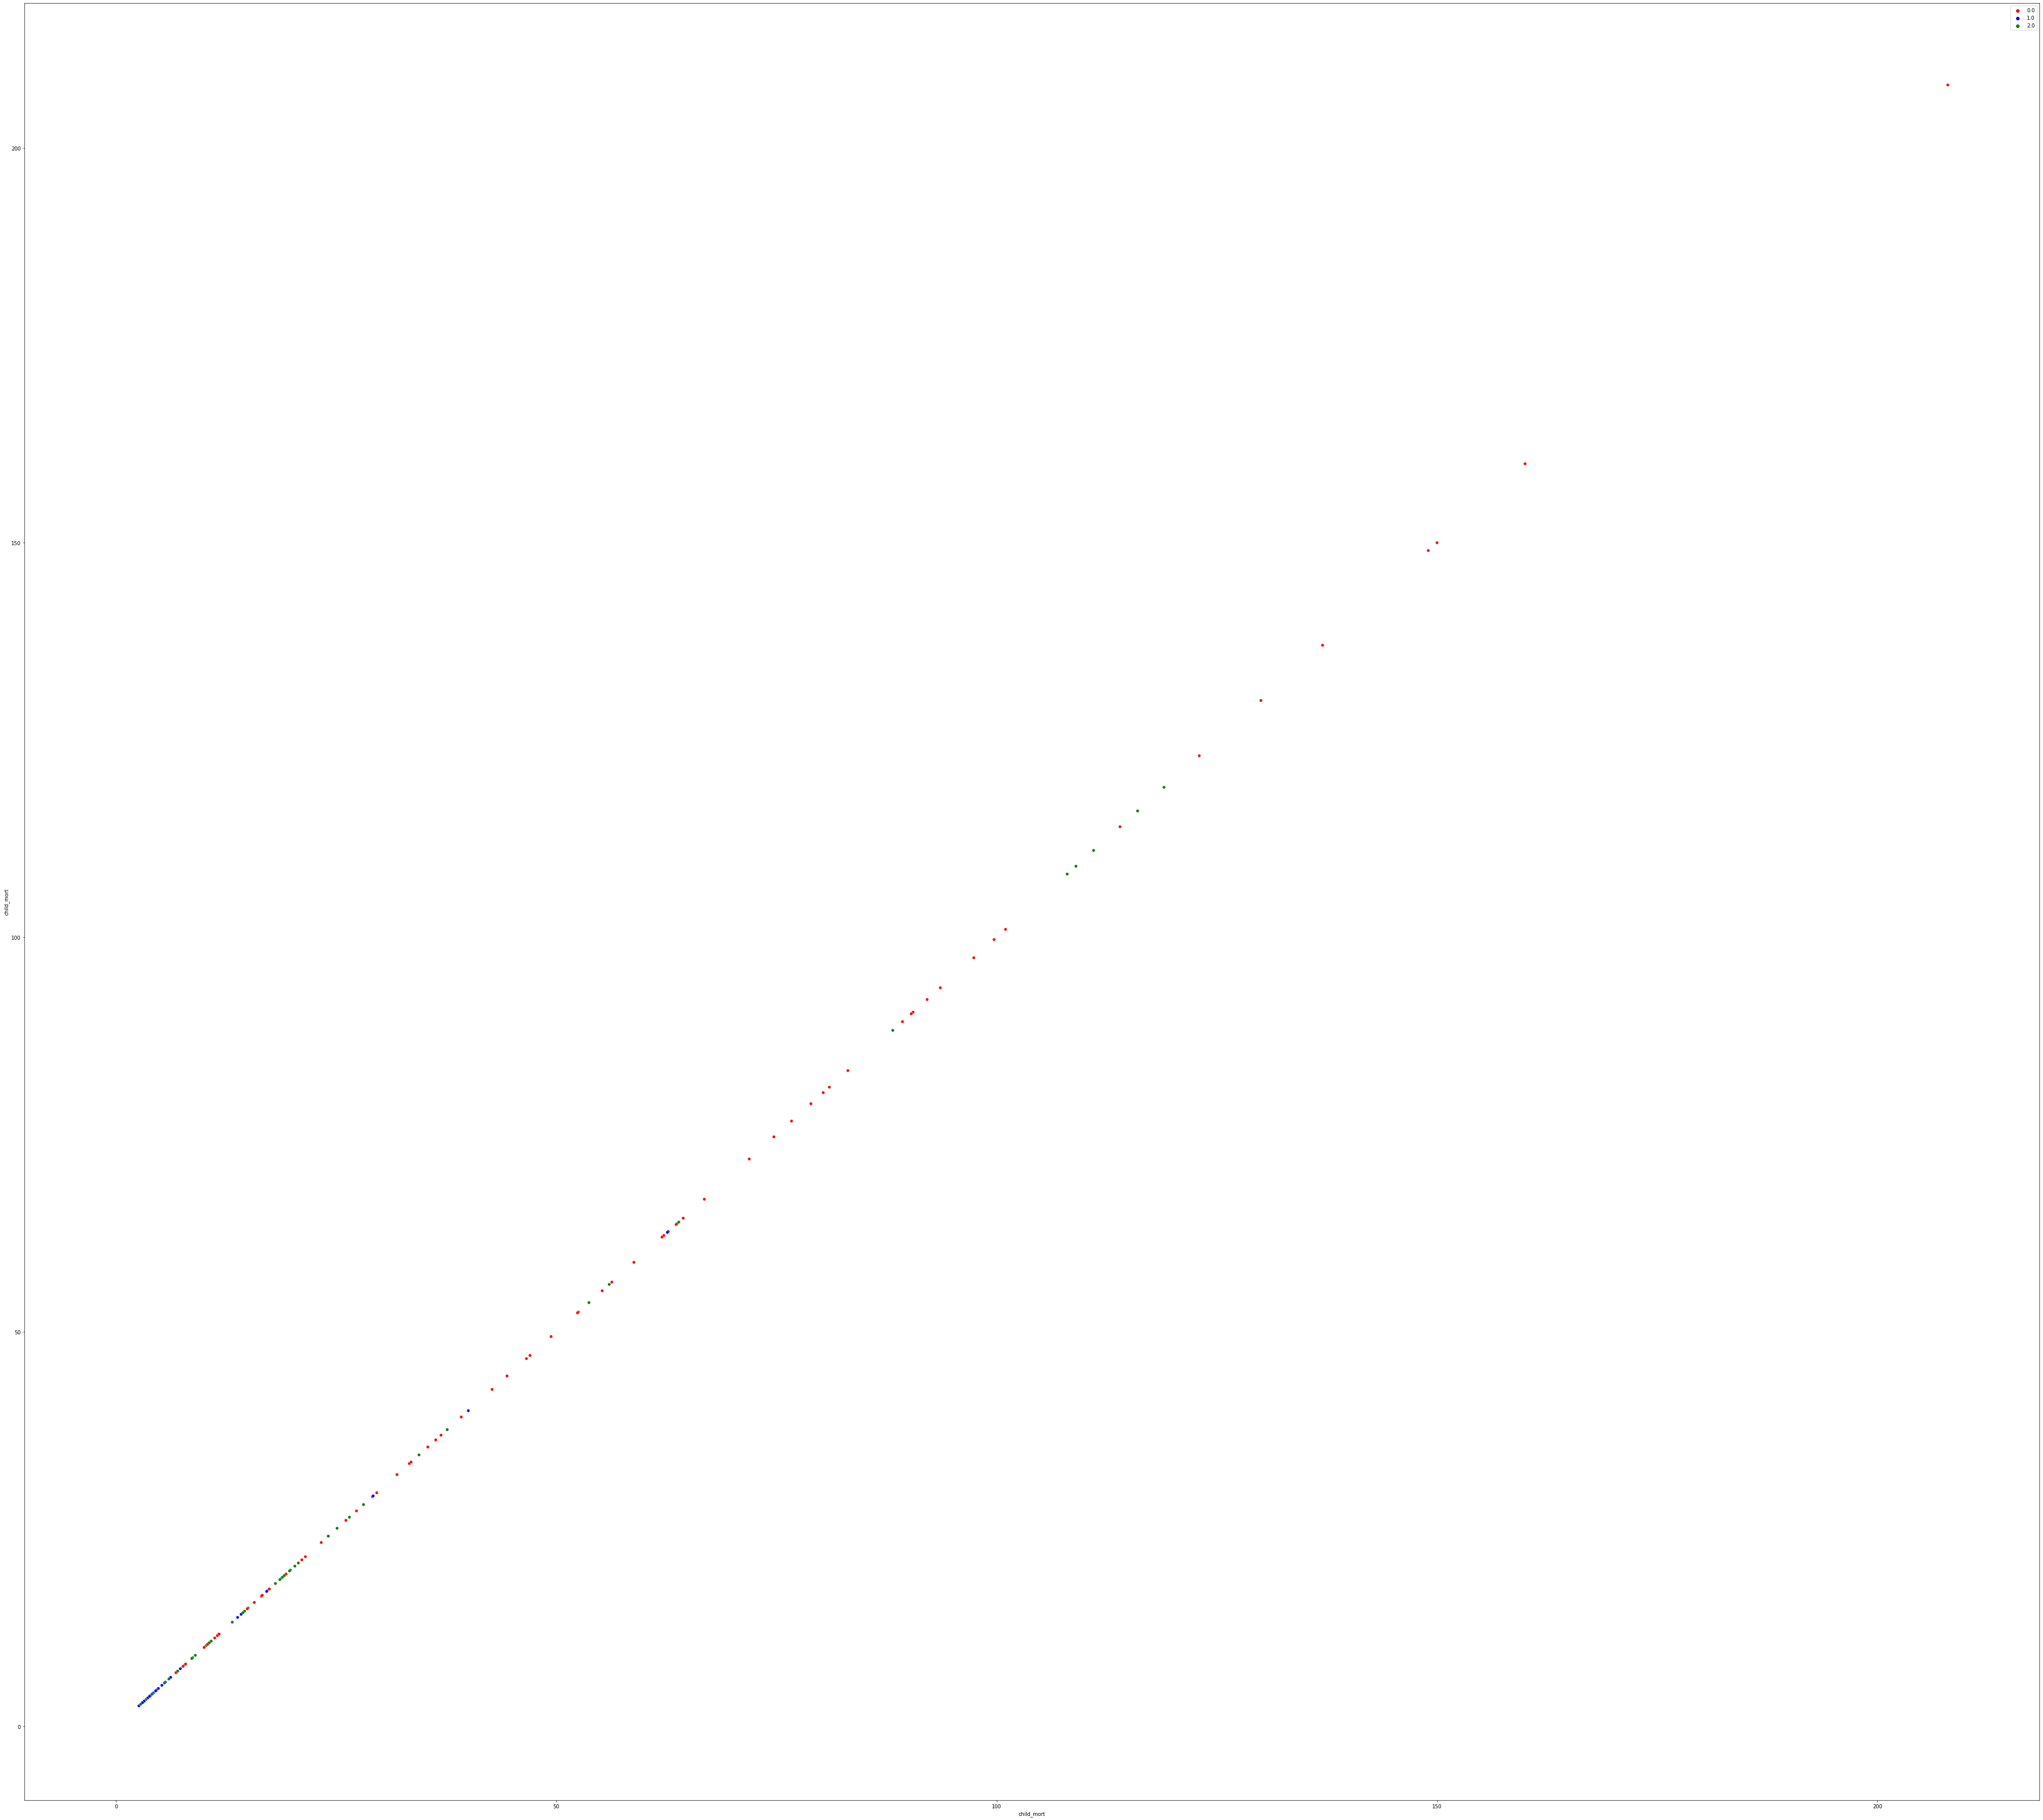

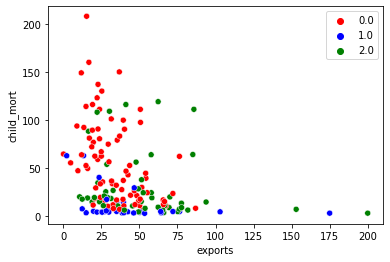

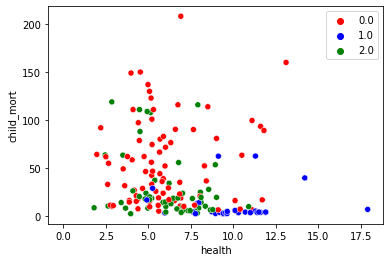

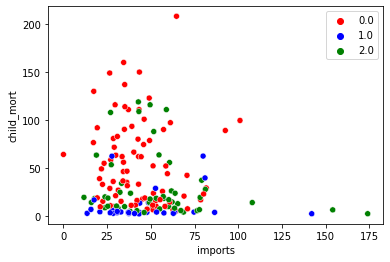

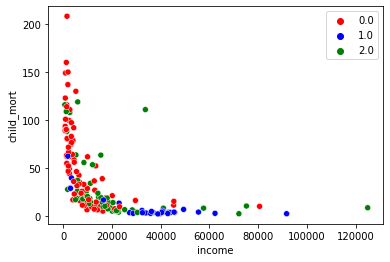

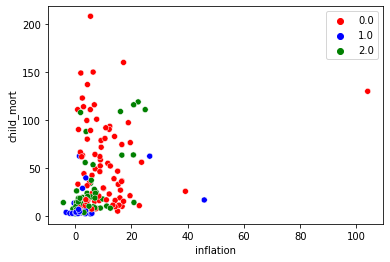

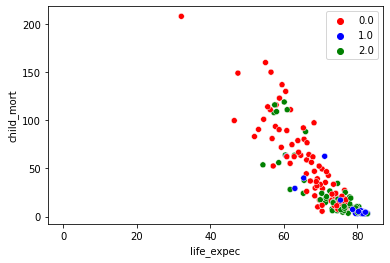

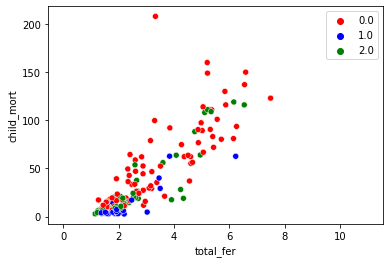

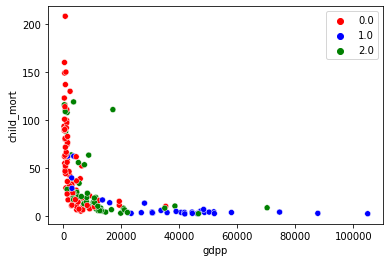

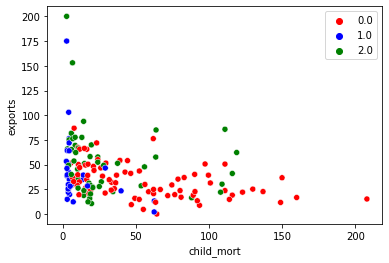

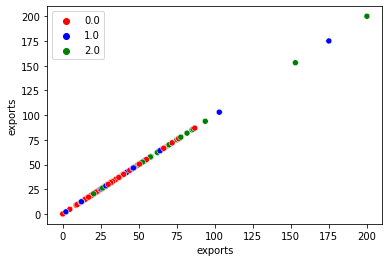

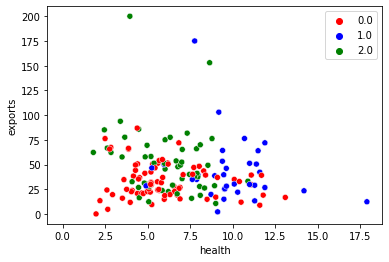

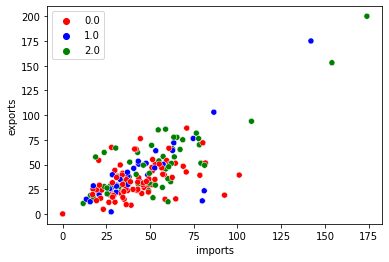

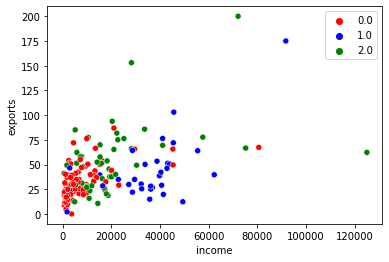

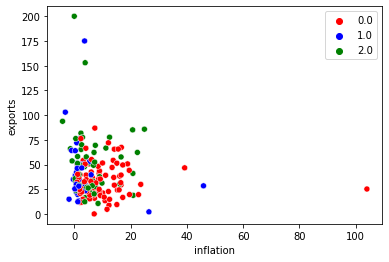

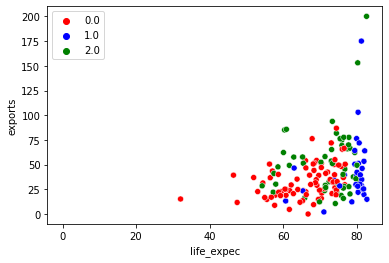

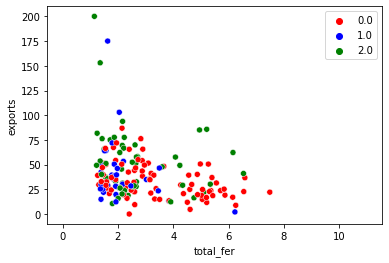

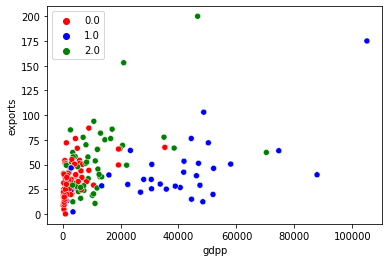

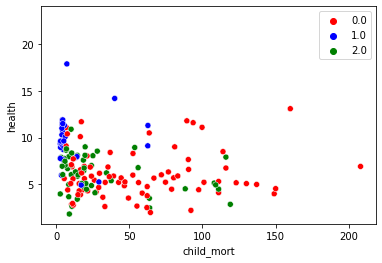

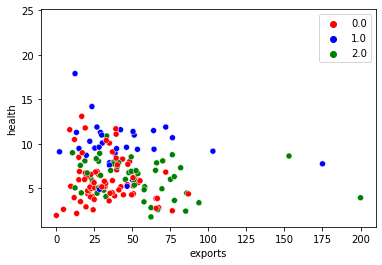

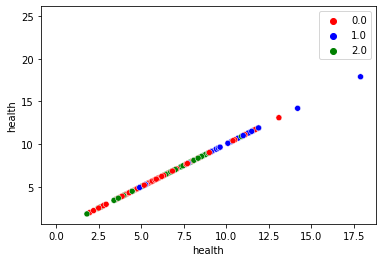

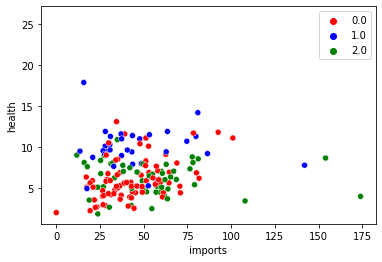

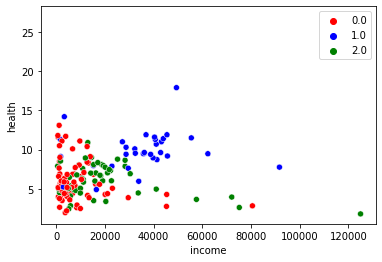

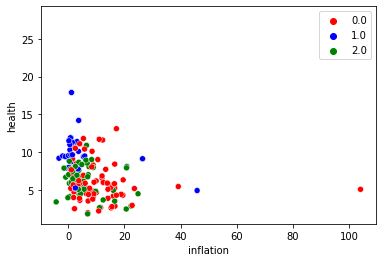

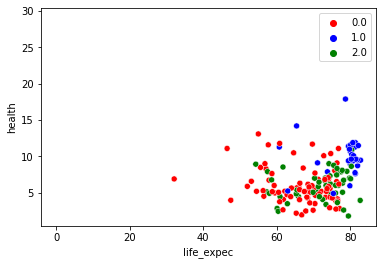

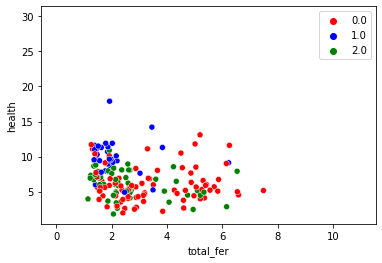

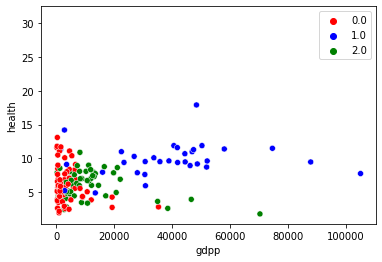

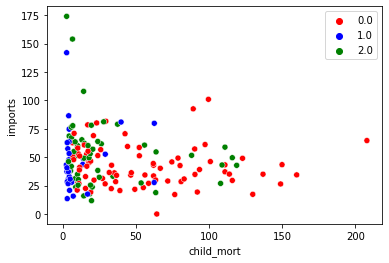

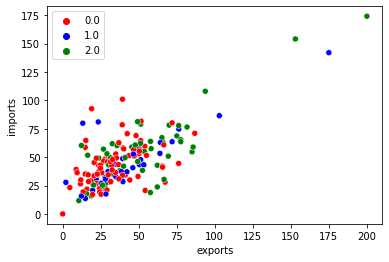

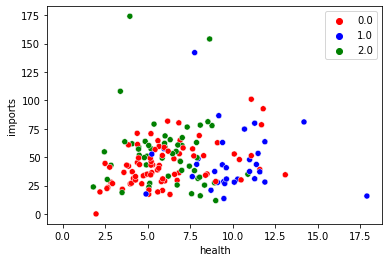

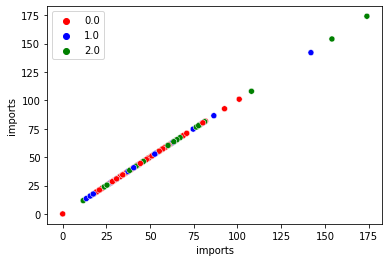

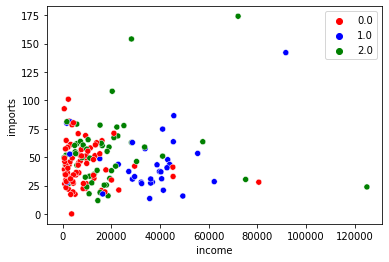

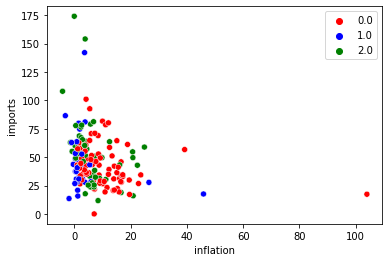

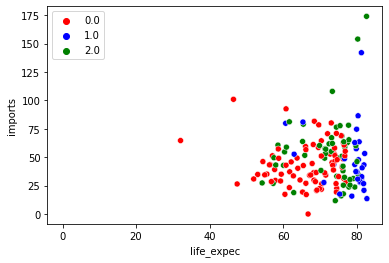

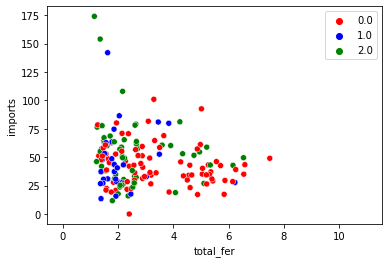

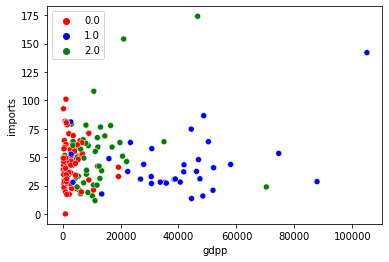

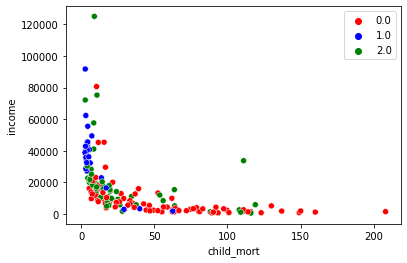

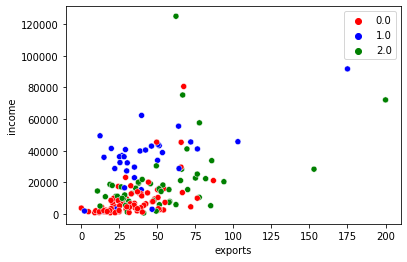

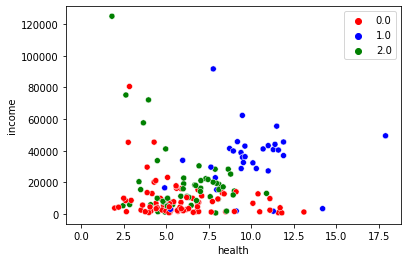

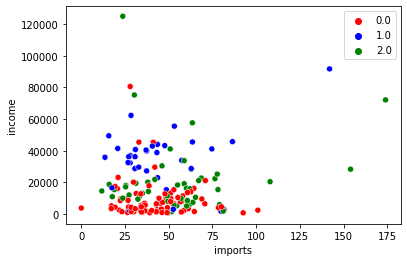

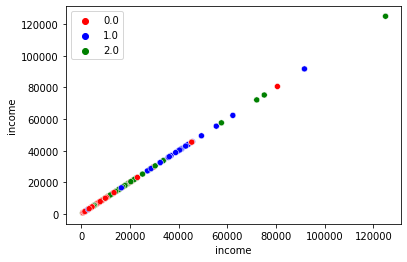

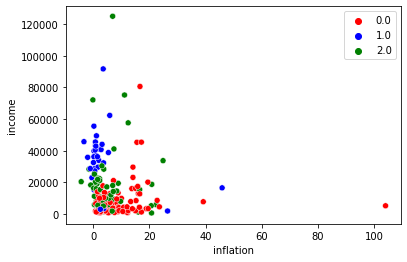

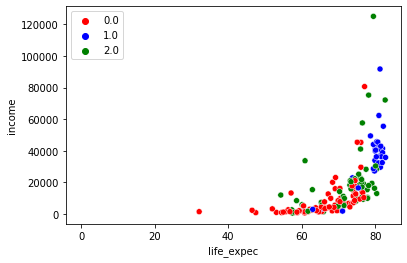

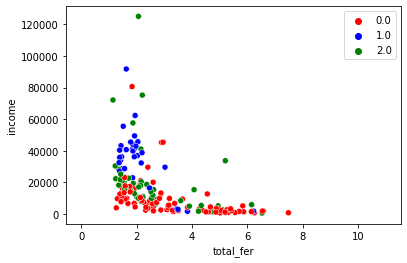

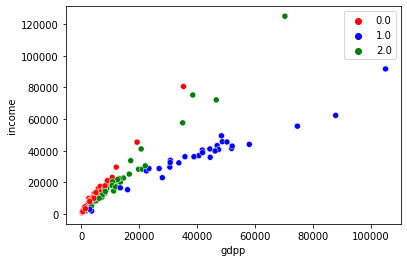

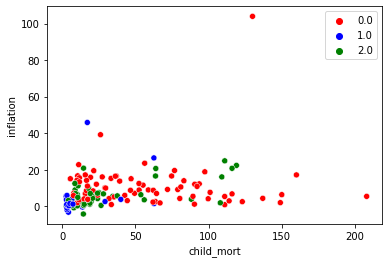

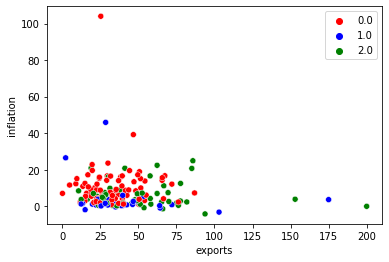

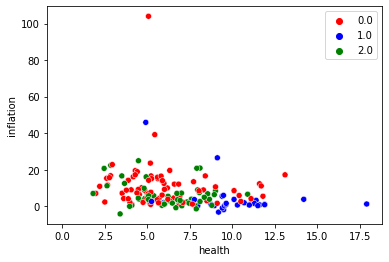

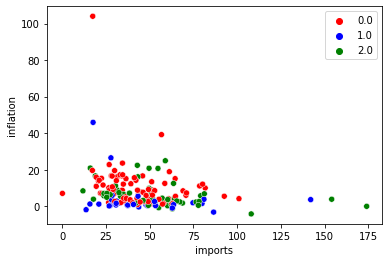

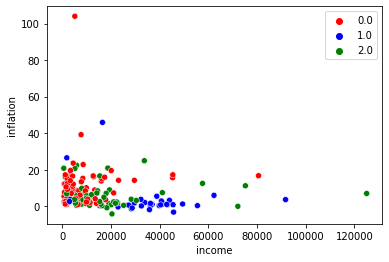

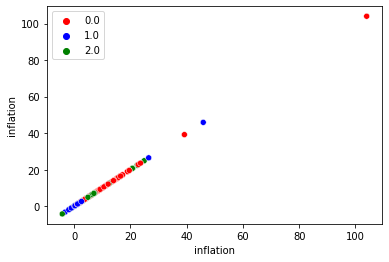

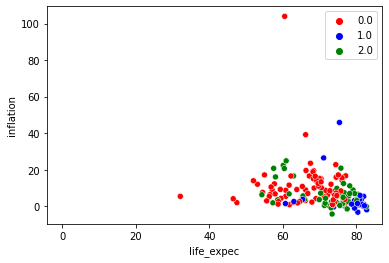

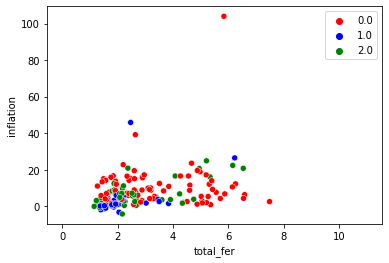

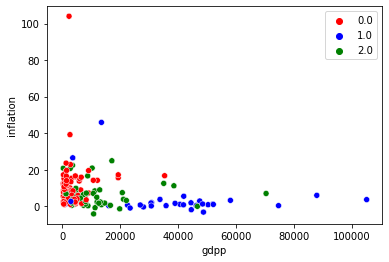

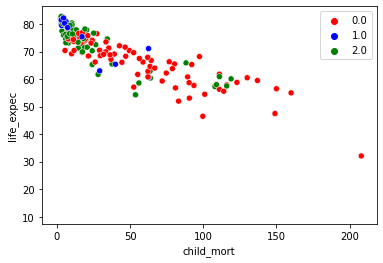

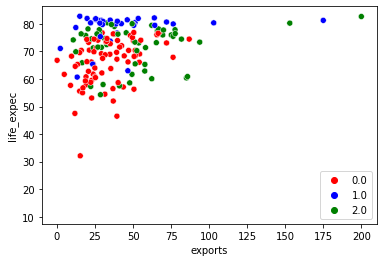

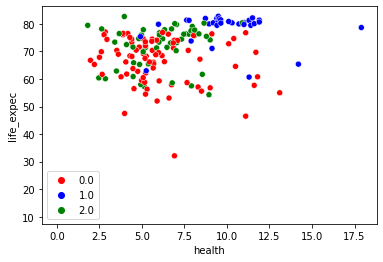

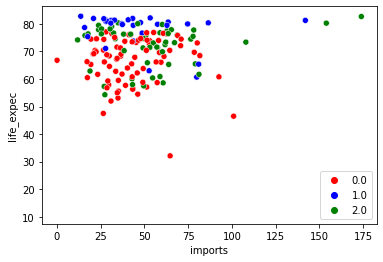

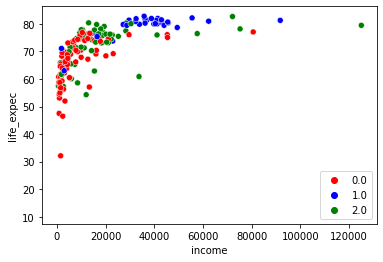

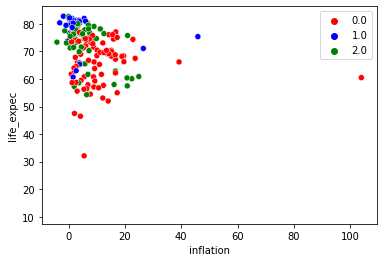

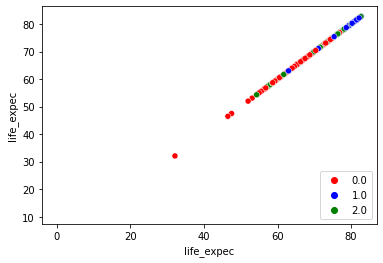

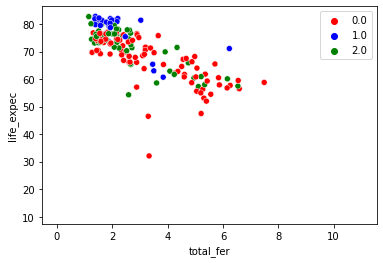

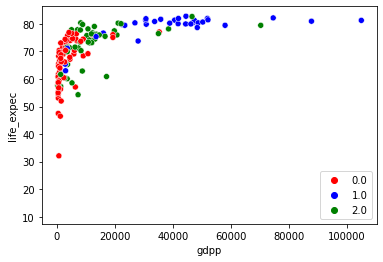

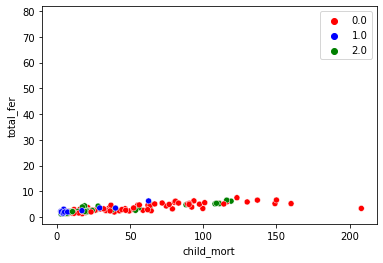

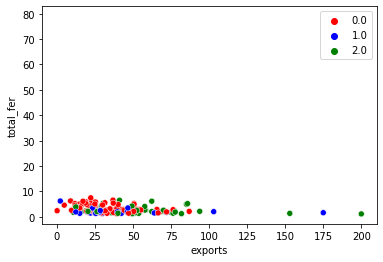

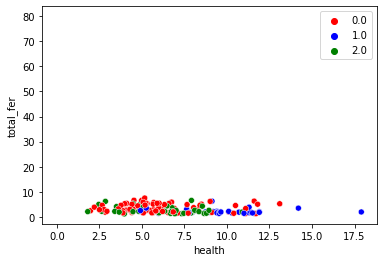

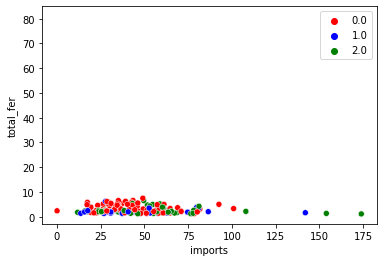

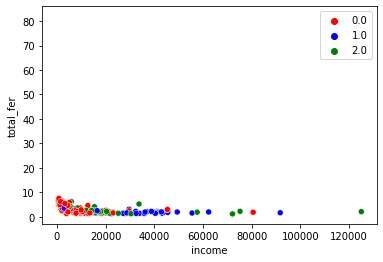

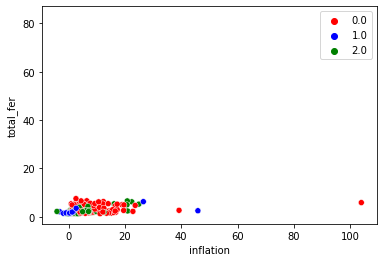

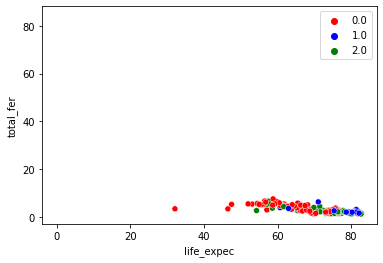

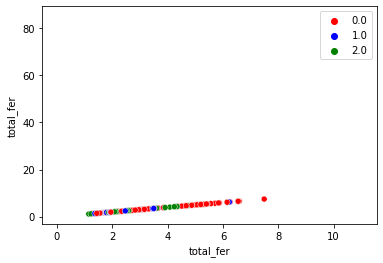

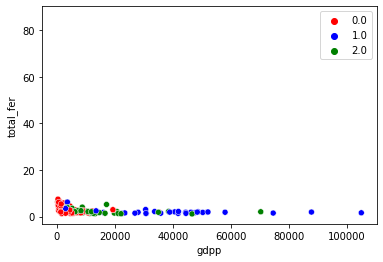

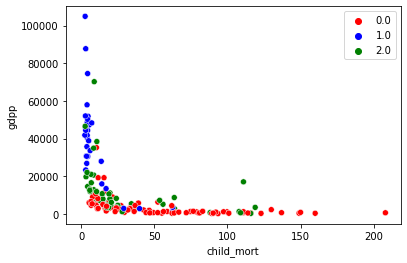

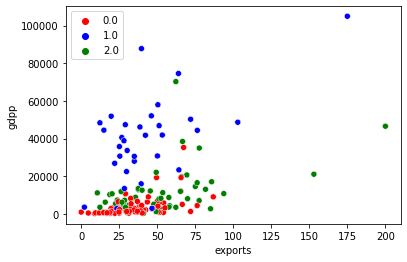

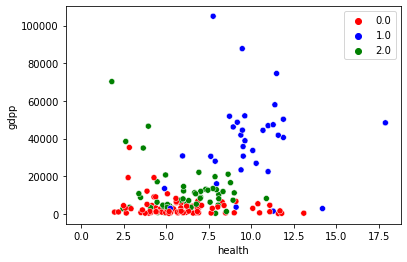

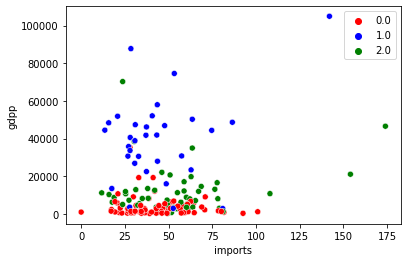

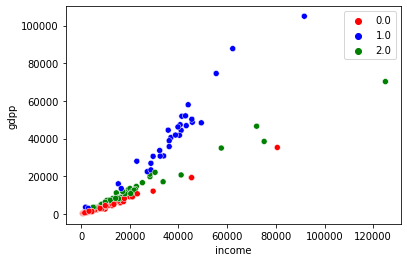

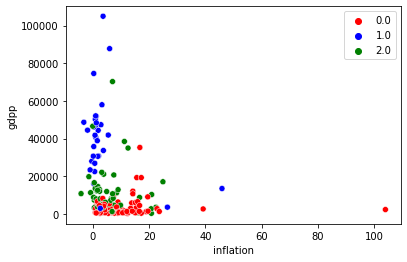

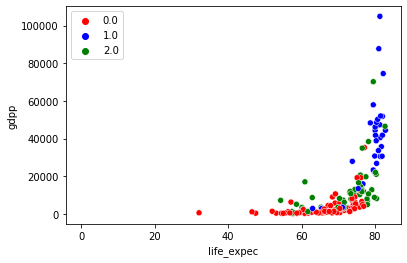

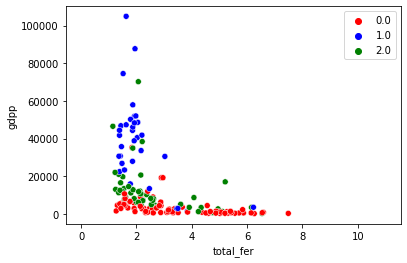

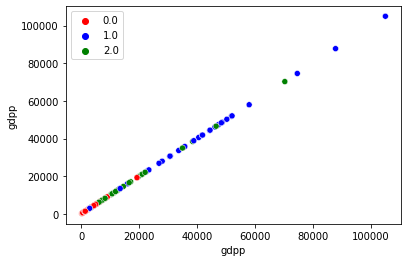

In [66]:
plt.clf()
plt.figure(figsize = (71, 65))
for j in range(len(data.iloc[1:].columns)-2):
    for i in range(len(data.iloc[1:].columns)-2):
        plt.plot(len(data.iloc[1:].columns),len(data.iloc[1:].columns),i+1+j*len(data.iloc[1:].columns))
        plot=sb.scatterplot(x = data.iloc[:,i+1], y = data.iloc[:,j+1], data = data[1:], hue = 'labels', palette=['red', 'blue', 'green'])
        plot.legend(fontsize=10)
        plt.savefig(f'visual0{i}.png')
        plt.show()

In [67]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters = 3, init='k-medoids++',random_state=0).fit(df)
labels = kmedoids.fit_predict(df)
sil_score = metrics.silhouette_score(df, labels, metric='euclidean')
print (sil_score)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.5191231066417167


In [71]:
country = data_1['country']
result = pd.DataFrame({'country': country, 'labels': labels})
data_1['labels'] = result['labels']
result

country  labels
0            Afghanistan       0
1                Albania       0
2                Algeria       0
3                 Angola       2
4    Antigua and Barbuda       2
..                   ...     ...
162              Vanuatu       1
163            Venezuela       1
164              Vietnam       0
165                Yemen       0
166               Zambia       0

[167 rows x 2 columns]

In [72]:
fig = px.choropleth(result, locationmode='country names', locations='country',color='labels',title='Coutries by Cluster Labels')
fig.show()

<Figure size 432x288 with 0 Axes>

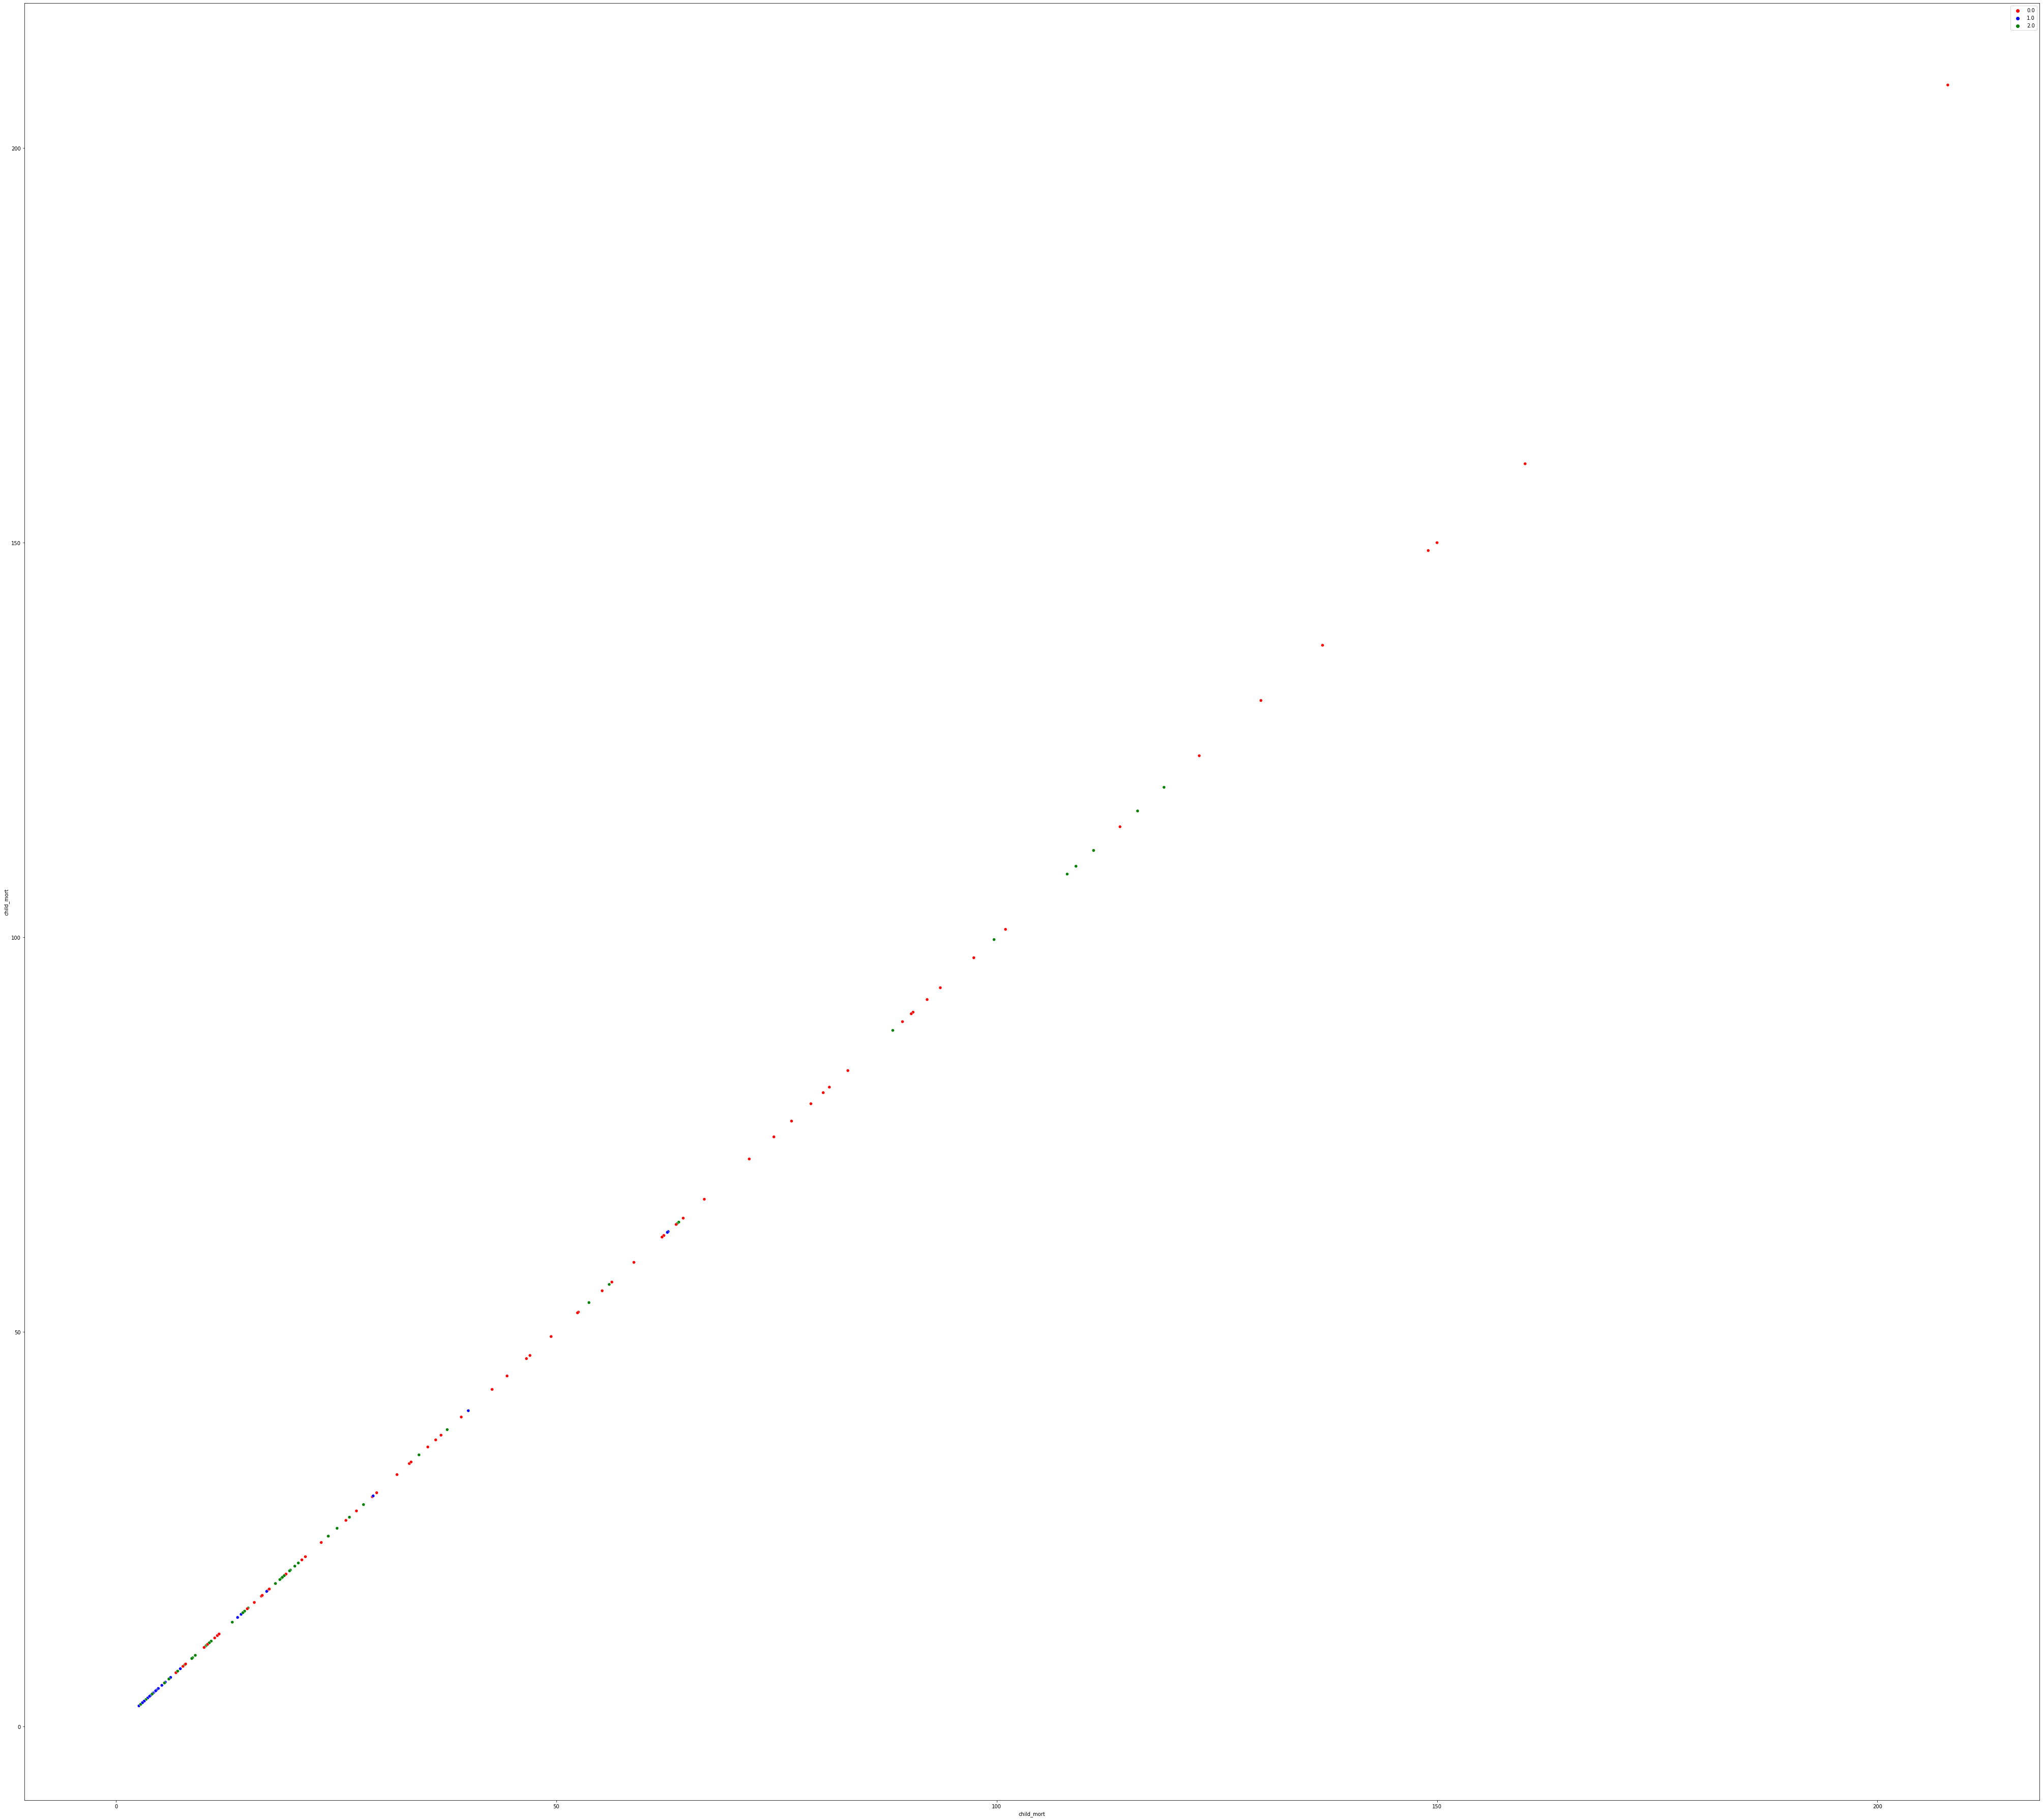

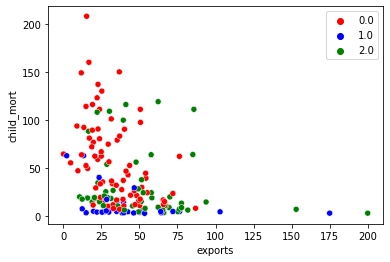

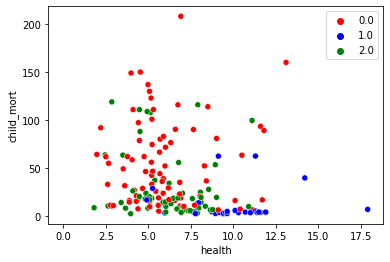

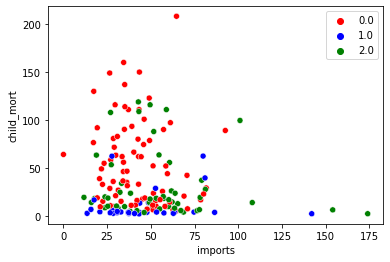

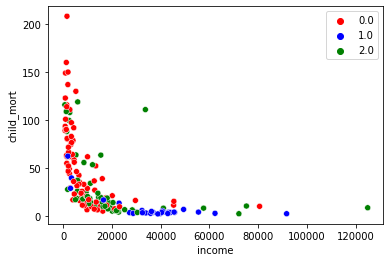

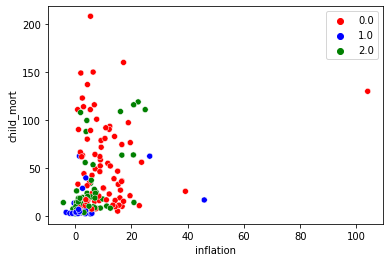

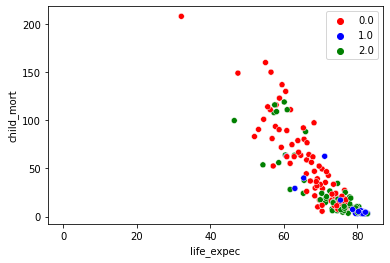

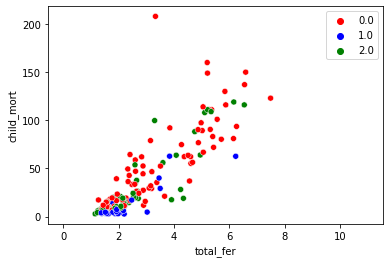

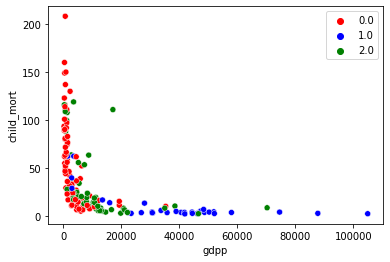

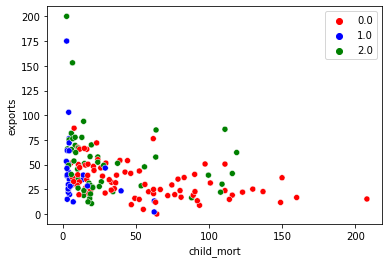

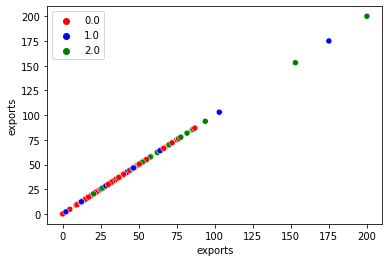

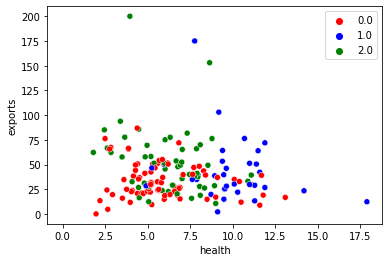

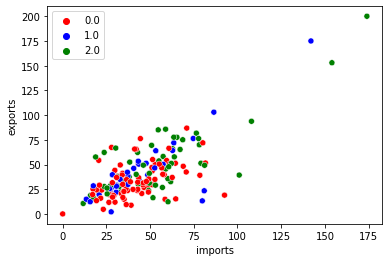

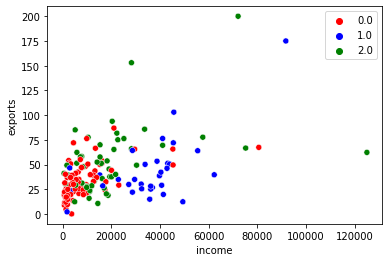

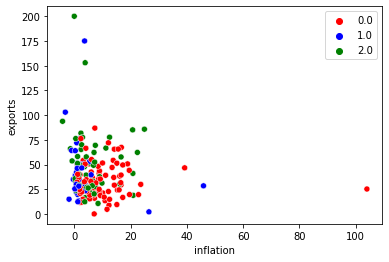

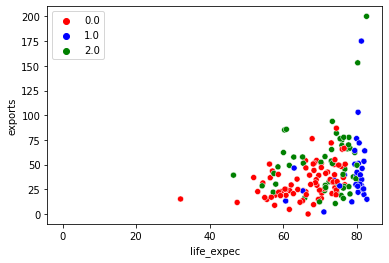

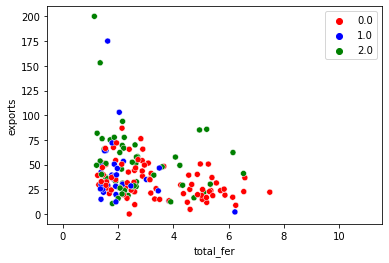

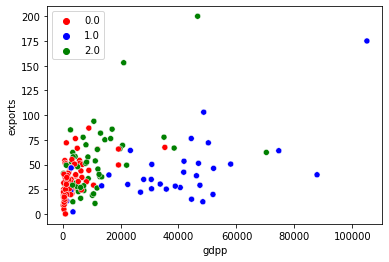

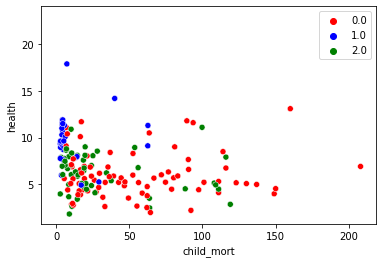

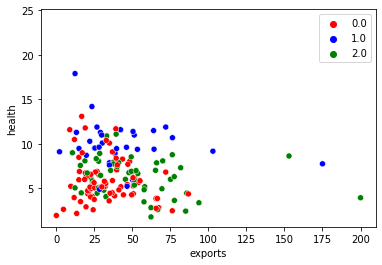

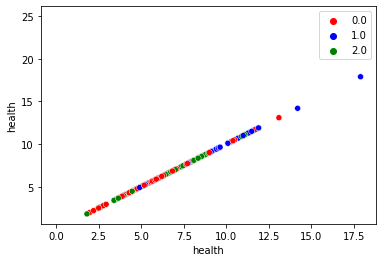

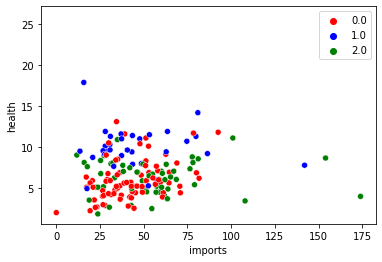

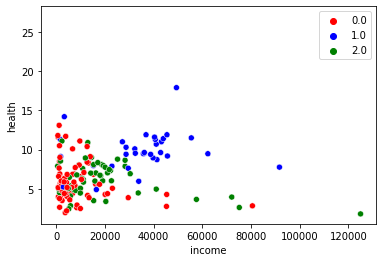

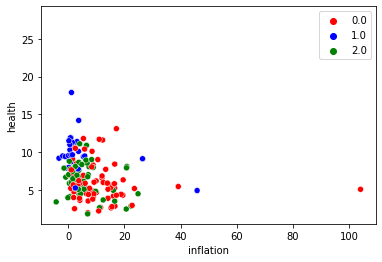

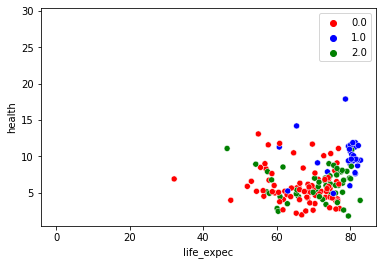

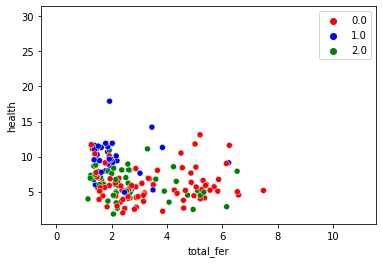

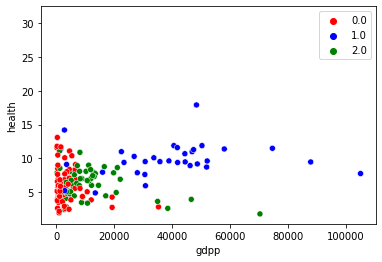

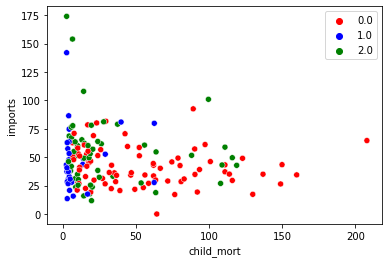

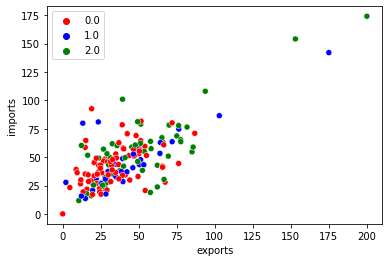

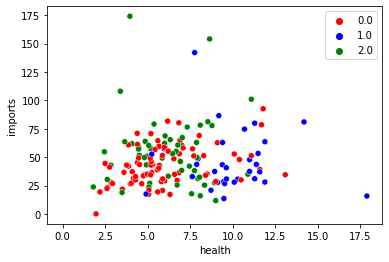

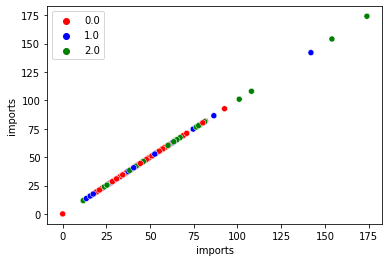

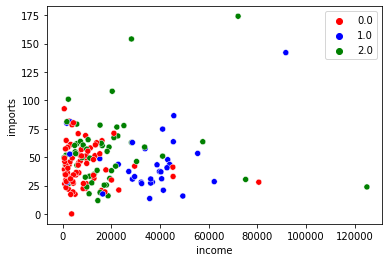

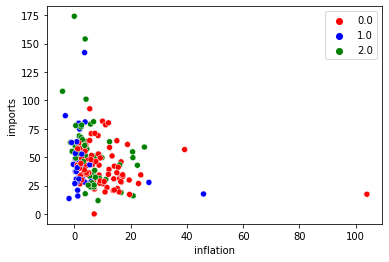

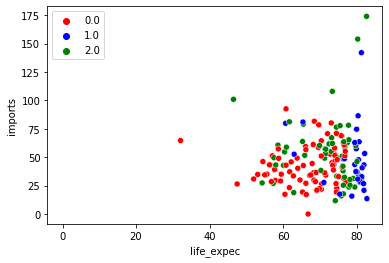

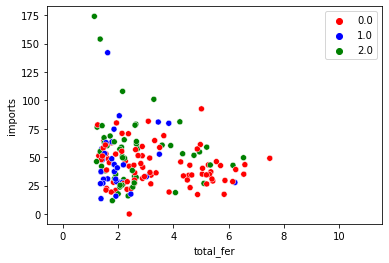

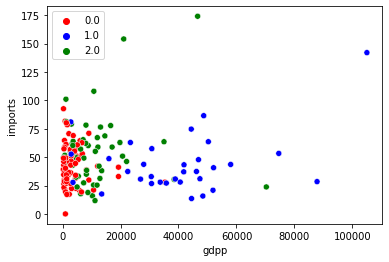

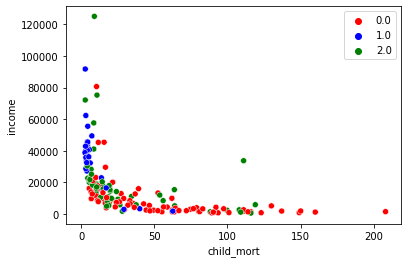

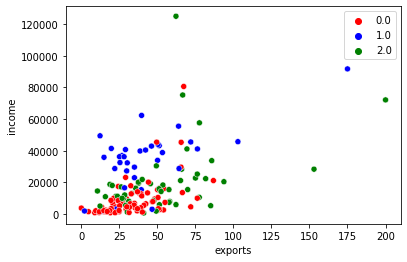

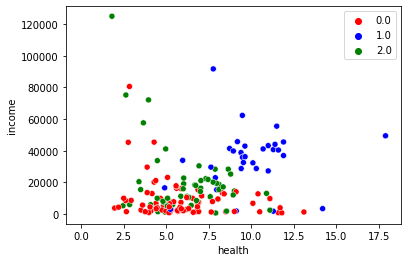

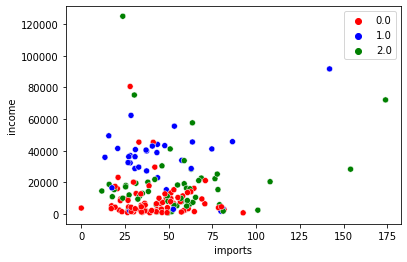

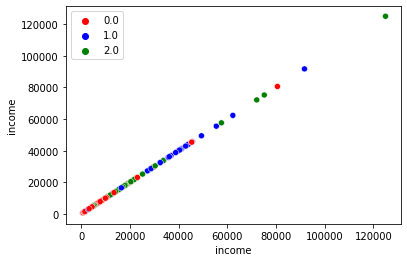

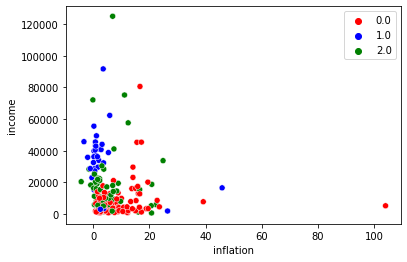

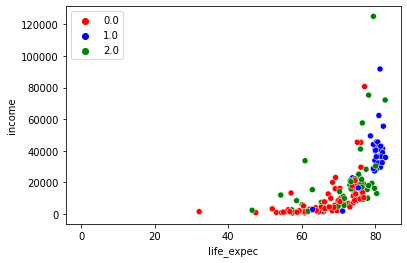

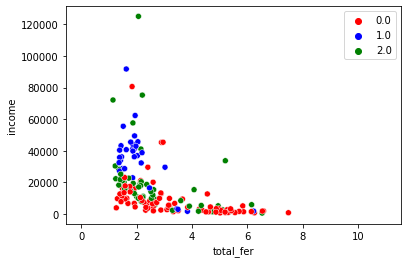

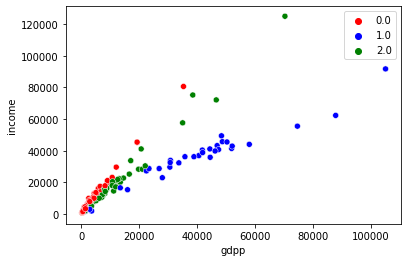

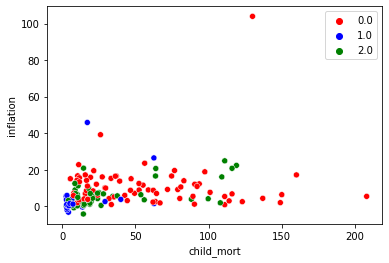

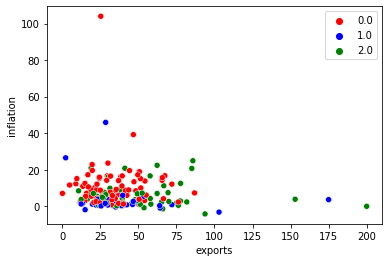

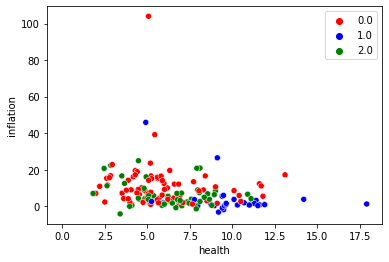

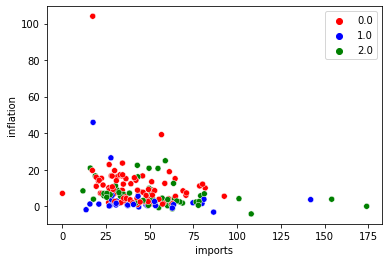

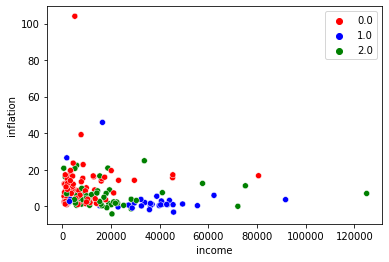

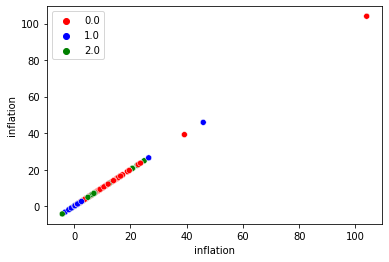

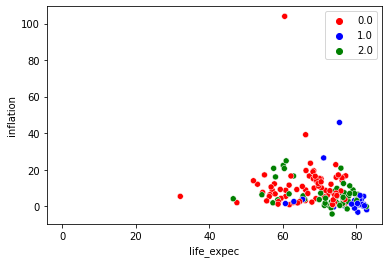

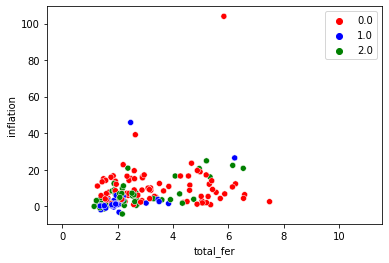

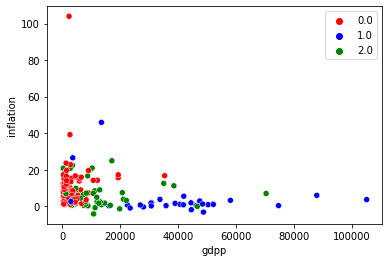

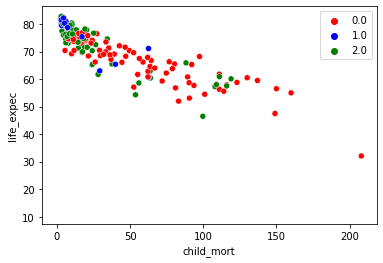

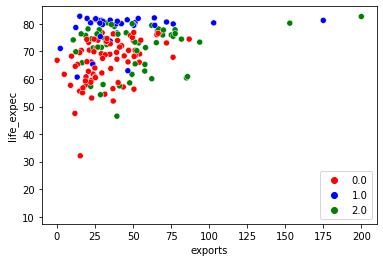

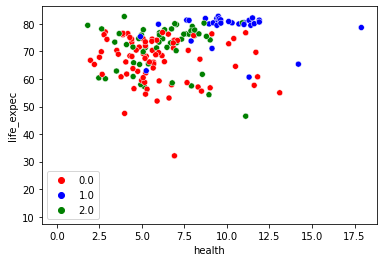

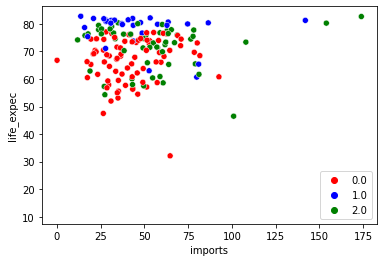

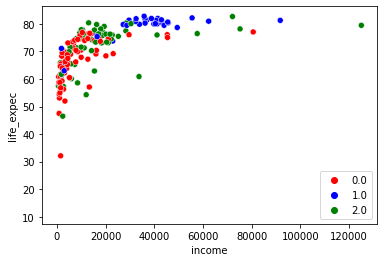

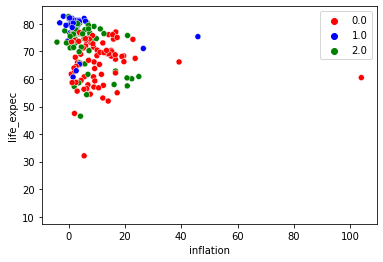

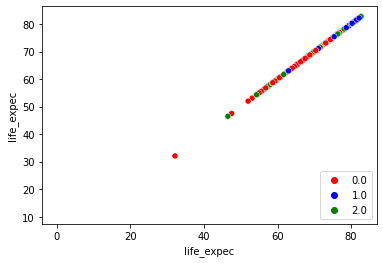

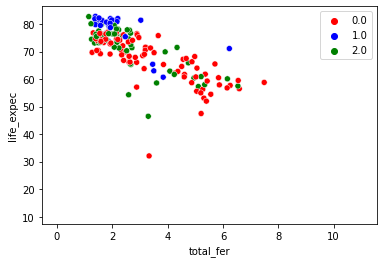

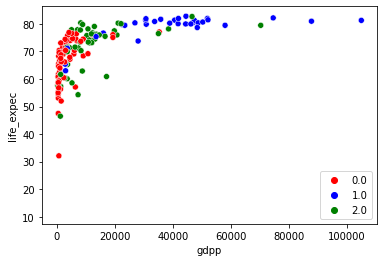

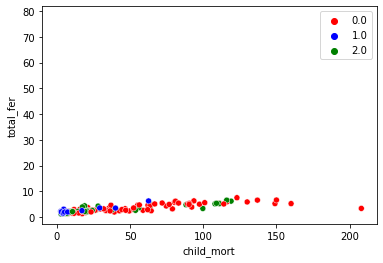

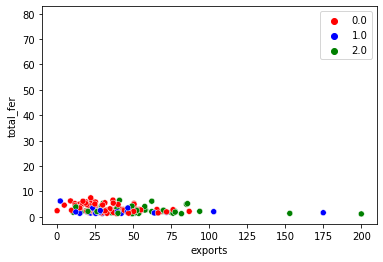

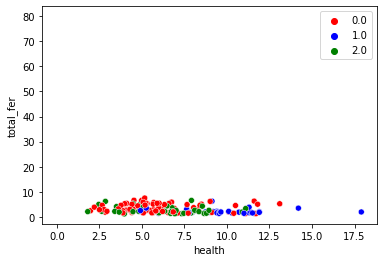

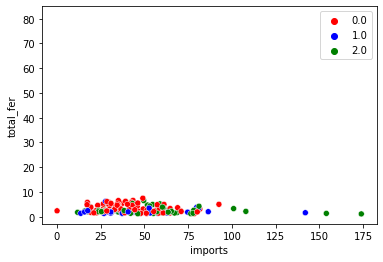

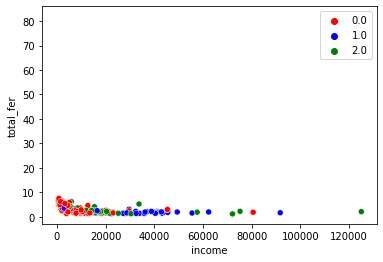

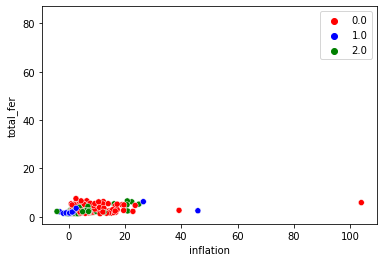

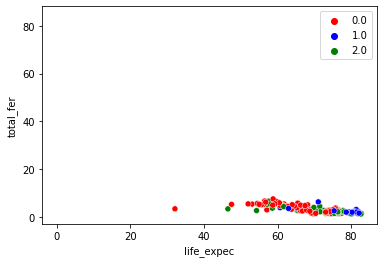

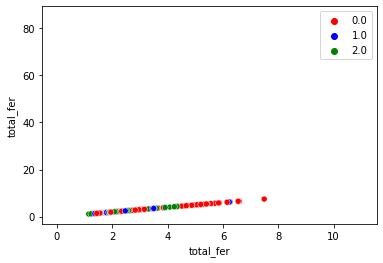

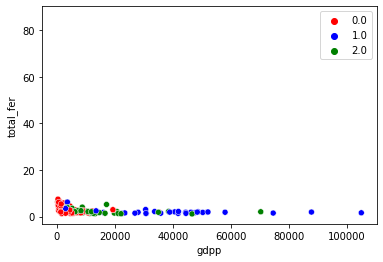

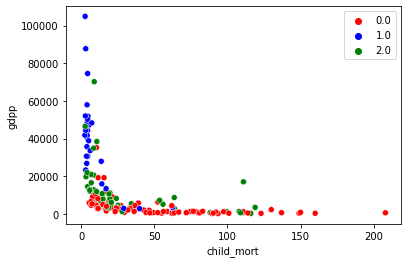

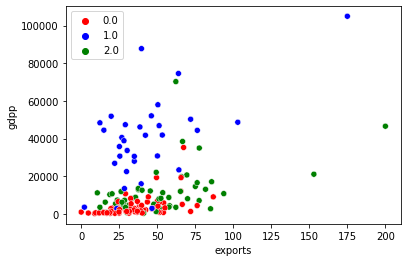

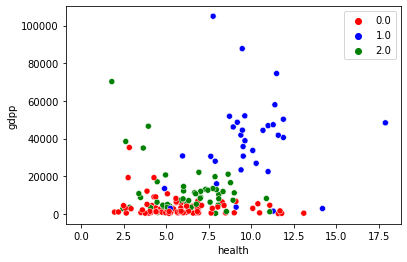

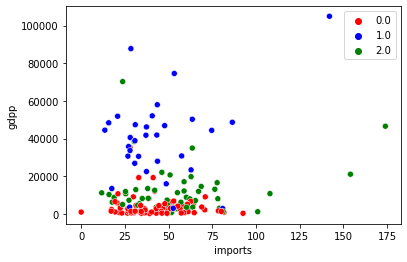

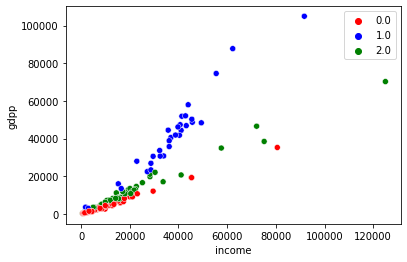

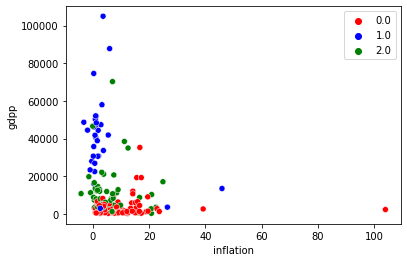

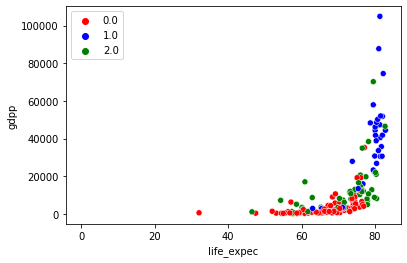

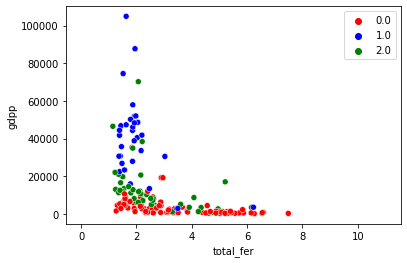

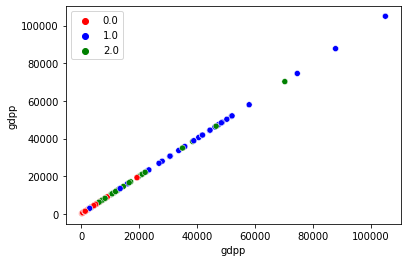

In [73]:
plt.clf()
plt.figure(figsize = (71, 65))
for j in range(len(data_1.iloc[1:].columns)-2):
    for i in range(len(data_1.iloc[1:].columns)-2):
        plt.plot(len(data_1.iloc[1:].columns),len(data_1.iloc[1:].columns),i+1+j*len(data_1.iloc[1:].columns))
        plot=sb.scatterplot(x = data_1.iloc[:,i+1], y = data_1.iloc[:,j+1], data = data_1[1:], hue = 'labels', palette=['red', 'blue', 'green'])
        plot.legend(fontsize=10)
        plt.savefig(f'visual2{i}.png')
        plt.show()